In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from copairs import map
from pycytominer import aggregate


In [2]:
# imports for showing Figure 1 from the paper
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

## Download data

Download a single plate of profiles from the dataset "cpg0004" (aka LINCS), which contains Cell Painting images of 1,327 small-molecule perturbations of A549 human cells. The wells on each plate were perturbed with 56 different compounds in six different doses.

> Way, G. P. et al. Morphology and gene expression profiling provide complementary information for mapping cell state. Cell Syst 13, 911–923.e9 (2022).

In [11]:
commit = "da8ae6a3bc103346095d61b4ee02f08fc85a5d98"
plate = "SQ00014812"
url = f"https://media.githubusercontent.com/media/broadinstitute/lincs-cell-painting/{commit}/profiles/2016_04_01_a549_48hr_batch1/{plate}/{plate}_normalized_feature_select.csv.gz"

df = pd.read_csv(url)
df = df.loc[:, df.nunique() > 1] # remove constant columns
df

,Metadata_broad_sample,Metadata_mg_per_ml,Metadata_mmoles_per_liter,Metadata_pert_id,Metadata_pert_mfc_id,Metadata_pert_well,Metadata_broad_sample_type,Metadata_pert_type,Metadata_broad_id,Metadata_InChIKey14,...,Nuclei_Texture_InverseDifferenceMoment_AGP_5_0,Nuclei_Texture_InverseDifferenceMoment_DNA_20_0,Nuclei_Texture_InverseDifferenceMoment_ER_5_0,Nuclei_Texture_InverseDifferenceMoment_Mito_10_0,Nuclei_Texture_InverseDifferenceMoment_Mito_5_0,Nuclei_Texture_SumAverage_RNA_5_0,Nuclei_Texture_SumEntropy_DNA_10_0,Nuclei_Texture_SumEntropy_DNA_20_0,Nuclei_Texture_SumEntropy_DNA_5_0,Nuclei_Texture_Variance_RNA_10_0
0,DMSO,0.000000,0.000000,NaN,NaN,A01,control,control,NaN,NaN,...,-1.3544,-1.07770,2.26020,-0.377010,-0.065840,2.12360,2.8740,2.87500,2.3047,-0.92358
1,DMSO,0.000000,0.000000,NaN,NaN,A02,control,control,NaN,NaN,...,-2.3840,-0.73440,1.12090,-0.182500,-0.061450,0.66985,2.3919,2.35230,1.8672,-0.11820
2,DMSO,0.000000,0.000000,NaN,NaN,A03,control,control,NaN,NaN,...,-1.9493,-0.36148,0.44050,0.326660,0.547200,0.25015,1.2271,0.77847,1.0651,-0.44810
3,DMSO,0.000000,0.000000,NaN,NaN,A04,control,control,NaN,NaN,...,-2.2909,-0.46380,0.96434,1.132200,0.753500,0.31403,1.4384,1.48110,1.2943,-0.83810
4,DMSO,0.000000,0.000000,NaN,NaN,A05,control,control,NaN,NaN,...,-1.8955,-1.05350,1.64840,0.057781,0.070229,1.60990,1.1296,0.90213,1.1016,0.53225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,BRD-K82746043-001-15-1,3.248700,3.333300,BRD-K82746043,BRD-K82746043-001-15-1,P20,trt,trt,BRD-K82746043,JLYAXFNOILIKPP,...,-6.1522,1.81410,1.54220,-1.874700,-1.133900,1.57540,-3.0962,-3.25160,-2.7683,1.40170
380,BRD-K82746043-001-15-1,1.082900,1.111100,BRD-K82746043,BRD-K82746043-001-15-1,P21,trt,trt,BRD-K82746043,JLYAXFNOILIKPP,...,-5.1586,1.50580,1.68420,-1.126400,-1.066600,1.24740,-1.5305,-1.79020,-1.2474,1.17600
381,BRD-K82746043-001-15-1,0.360970,0.370370,BRD-K82746043,BRD-K82746043-001-15-1,P22,trt,trt,BRD-K82746043,JLYAXFNOILIKPP,...,-5.9475,1.42100,1.51020,-1.103600,-1.666500,1.19840,-2.6086,-2.97620,-2.0026,0.91557
382,BRD-K82746043-001-15-1,0.120320,0.123460,BRD-K82746043,BRD-K82746043-001-15-1,P23,trt,trt,BRD-K82746043,JLYAXFNOILIKPP,...,-8.4408,2.99620,2.55230,-2.275200,-1.783500,2.49200,-4.3964,-4.19030,-3.8360,1.02240


In [16]:
df["Metadata_target"].unique()

array([nan, 'CHRM1|CHRM2|CHRM3|CHRM4|CHRM5', 'HMGCR',
       'HDAC1|HDAC2|HDAC3|HDAC9', 'ERBB2', 'DNMT1|DNMT3A',
       'GABRA1|GABRA2|GABRA3|GABRA4|GABRA5|GABRA6', 'TUBB', 'KIF11',
       'PSMA1|PSMA2|PSMA3|PSMA4|PSMA5|PSMA6|PSMA7|PSMA8|PSMB1|PSMB10|PSMB11|PSMB2|PSMB3|PSMB4|PSMB5|PSMB6|PSMB7|PSMB8|PSMB9|PSMD1|PSMD2|RELA',
       'SQLE', 'GABRA1', 'KCNT2|TRPV4', 'AURKA|AURKB',
       'DRD2|GRIN2A|GRIN2B|GRIN2C|GRIN2D|GRIN3A', 'CFTR',
       'CACNA1C|CACNA1S|CACNA2D1|CACNG1|HTR3A|KCNA5',
       'ADRA1A|ADRA1B|ADRA2A|ADRA2B|ADRA2C|CHRM1|CHRM2|CHRM3|CHRM4|CHRM5|DRD1|DRD2|DRD3|DRD4|DRD5|HRH1|HTR1A|HTR1B|HTR1D|HTR1E|HTR2A|HTR2C|HTR3A|HTR6|HTR7',
       'EGFR|NR1I2', 'ADRA1A|ADRA2A|HRH1|HTR1A|HTR2A|HTR2B|HTR2C|SLC6A4',
       'EGFR|ERBB2', 'HIF1A', 'ESR1|ESR2|MAP1A|MAP2', 'SCN4A|SCN9A',
       'BIRC2|XIAP', 'AKT1|AKT2|AKT3|PRKG1', 'ACE',
       'HTR1A|HTR1B|HTR1D|HTR1E|HTR1F|HTR2A|HTR2B|HTR2C|HTR5A|HTR6|HTR7',
       'CYSLTR1|CYSLTR2', 'GAST', 'HTR1A', 'PSMB1', 'MET', 'NAE1|UBA3',
       'VD

## Calculate mAP for assessing phenotypic activity of compounds

Phenotypic activity of a perturbation reflects the average extent to which its replicate profiles are more similar to each other compared to control profiles (see Figure 1E).

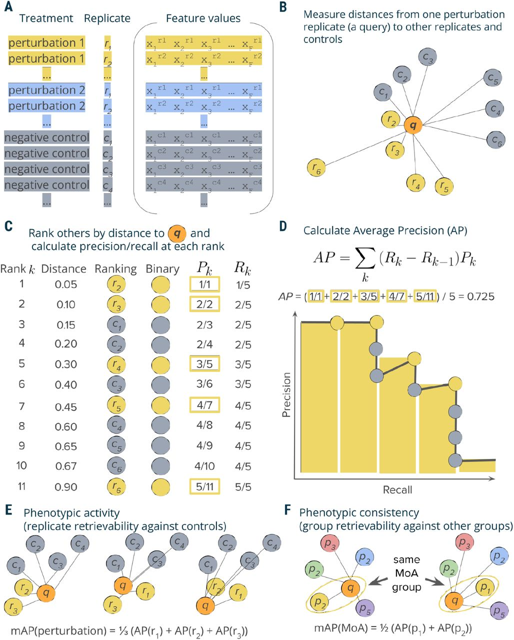

In [4]:
figure_url = "https://www.biorxiv.org/content/biorxiv/early/2024/04/02/2024.04.01.587631/F1.large.jpg"
response = requests.get(figure_url)
image = Image.open(BytesIO(response.content))

size = (514, 640)
image = image.resize(size)
display(image)

Here, we treat different doses of each compound as replicates and assess how well we can retrieve them by similarity against the group of negative controls (DMSO).

To ensure correct grouping of profiles, we can add a dummy column that is equal to row index for all compound replicates and to -1 for all DMSO replicates. 

In [5]:
# make deafult value equal to row index
df["Metadata_treatment_index"] = df.index
# make index equal to -1 for all DMSO treatment replicates
df.loc[df["Metadata_broad_sample"] == "DMSO", "Metadata_treatment_index"] = -1
# now all treatment replicates differ in the index column, except for DMSO replicates
df

,Metadata_broad_sample,Metadata_mg_per_ml,Metadata_mmoles_per_liter,Metadata_pert_id,Metadata_pert_mfc_id,Metadata_pert_well,Metadata_broad_sample_type,Metadata_pert_type,Metadata_broad_id,Metadata_InChIKey14,...,Nuclei_Texture_InverseDifferenceMoment_DNA_20_0,Nuclei_Texture_InverseDifferenceMoment_ER_5_0,Nuclei_Texture_InverseDifferenceMoment_Mito_10_0,Nuclei_Texture_InverseDifferenceMoment_Mito_5_0,Nuclei_Texture_SumAverage_RNA_5_0,Nuclei_Texture_SumEntropy_DNA_10_0,Nuclei_Texture_SumEntropy_DNA_20_0,Nuclei_Texture_SumEntropy_DNA_5_0,Nuclei_Texture_Variance_RNA_10_0,Metadata_treatment_index
0,DMSO,0.000000,0.000000,NaN,NaN,A01,control,control,NaN,NaN,...,-1.07770,2.26020,-0.377010,-0.065840,2.12360,2.8740,2.87500,2.3047,-0.92358,-1
1,DMSO,0.000000,0.000000,NaN,NaN,A02,control,control,NaN,NaN,...,-0.73440,1.12090,-0.182500,-0.061450,0.66985,2.3919,2.35230,1.8672,-0.11820,-1
2,DMSO,0.000000,0.000000,NaN,NaN,A03,control,control,NaN,NaN,...,-0.36148,0.44050,0.326660,0.547200,0.25015,1.2271,0.77847,1.0651,-0.44810,-1
3,DMSO,0.000000,0.000000,NaN,NaN,A04,control,control,NaN,NaN,...,-0.46380,0.96434,1.132200,0.753500,0.31403,1.4384,1.48110,1.2943,-0.83810,-1
4,DMSO,0.000000,0.000000,NaN,NaN,A05,control,control,NaN,NaN,...,-1.05350,1.64840,0.057781,0.070229,1.60990,1.1296,0.90213,1.1016,0.53225,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,BRD-K82746043-001-15-1,3.248700,3.333300,BRD-K82746043,BRD-K82746043-001-15-1,P20,trt,trt,BRD-K82746043,JLYAXFNOILIKPP,...,1.81410,1.54220,-1.874700,-1.133900,1.57540,-3.0962,-3.25160,-2.7683,1.40170,379
380,BRD-K82746043-001-15-1,1.082900,1.111100,BRD-K82746043,BRD-K82746043-001-15-1,P21,trt,trt,BRD-K82746043,JLYAXFNOILIKPP,...,1.50580,1.68420,-1.126400,-1.066600,1.24740,-1.5305,-1.79020,-1.2474,1.17600,380
381,BRD-K82746043-001-15-1,0.360970,0.370370,BRD-K82746043,BRD-K82746043-001-15-1,P22,trt,trt,BRD-K82746043,JLYAXFNOILIKPP,...,1.42100,1.51020,-1.103600,-1.666500,1.19840,-2.6086,-2.97620,-2.0026,0.91557,381
382,BRD-K82746043-001-15-1,0.120320,0.123460,BRD-K82746043,BRD-K82746043-001-15-1,P23,trt,trt,BRD-K82746043,JLYAXFNOILIKPP,...,2.99620,2.55230,-2.275200,-1.783500,2.49200,-4.3964,-4.19030,-3.8360,1.02240,382


Next, we define the rules by which profiles are grouped based on metadata:

* Two profiles are a positive pair if they belong to the same group (i.e., they are replicates of the same compound). Therefore, they should share the same value in the metadata column that identifies the specific compound. We add this column to a list names `pos_sameby`.

* No metadata columns are additionally needed to tell apart replicates of the same compound here (although in theory, one could request them to be from different plate rows or columns, for instance). So we keep `pos_diffby` empty.

* Two profiles are a negative pair when one of them belongs to a group of compound replicates and another to a group of controls. That means they should be different both in the metadata column that identifies the specific compound and the treatment index columns that we created. The latter is needed to ensure that replicates of compounds are retrieved against only negative controls at this stage (and not against replicates of other compounds). We list these columns in `neg_diffby`.

* No metadata columns are additionally needed to define negative pairs. So we keep `neg_sameby` empty.

In [6]:
# positive pairs are replicates of the same treatment
pos_sameby = ["Metadata_broad_sample"]
pos_diffby = []

neg_sameby = []
# negative pairs are replicates of different treatments 
neg_diffby = ["Metadata_broad_sample", "Metadata_treatment_index"]

Now we can use `average_precision` function to calculate the average precision score for each replicate of each compound.

In [7]:
metadata = df.filter(regex="^Metadata")
profiles = df.filter(regex="^(?!Metadata)").values

ap_scores = map.average_precision(metadata, profiles, pos_sameby, pos_diffby, neg_sameby, neg_diffby)
ap_scores = ap_scores.query("Metadata_broad_sample != 'DMSO'") # remove DMSO
ap_scores

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

,Metadata_broad_sample,Metadata_mg_per_ml,Metadata_mmoles_per_liter,Metadata_pert_id,Metadata_pert_mfc_id,Metadata_pert_well,Metadata_broad_sample_type,Metadata_pert_type,Metadata_broad_id,Metadata_InChIKey14,Metadata_moa,Metadata_target,Metadata_broad_date,Metadata_Well,Metadata_treatment_index,n_pos_pairs,n_total_pairs,average_precision
6,BRD-K74363950-004-01-0,5.655600,10.000000,BRD-K74363950,BRD-K74363950-004-01-0,A07,trt,trt,BRD-K74363950,ASMXXROZKSBQIH,acetylcholine receptor antagonist,CHRM1|CHRM2|CHRM3|CHRM4|CHRM5,broad_id_20170327,A07,6,5,383,0.050922
7,BRD-K74363950-004-01-0,1.885200,3.333300,BRD-K74363950,BRD-K74363950-004-01-0,A08,trt,trt,BRD-K74363950,ASMXXROZKSBQIH,acetylcholine receptor antagonist,CHRM1|CHRM2|CHRM3|CHRM4|CHRM5,broad_id_20170327,A08,7,5,383,0.308904
8,BRD-K74363950-004-01-0,0.628400,1.111100,BRD-K74363950,BRD-K74363950-004-01-0,A09,trt,trt,BRD-K74363950,ASMXXROZKSBQIH,acetylcholine receptor antagonist,CHRM1|CHRM2|CHRM3|CHRM4|CHRM5,broad_id_20170327,A09,8,5,383,0.412513
9,BRD-K74363950-004-01-0,0.209470,0.370370,BRD-K74363950,BRD-K74363950-004-01-0,A10,trt,trt,BRD-K74363950,ASMXXROZKSBQIH,acetylcholine receptor antagonist,CHRM1|CHRM2|CHRM3|CHRM4|CHRM5,broad_id_20170327,A10,9,5,383,0.377730
10,BRD-K74363950-004-01-0,0.069823,0.123460,BRD-K74363950,BRD-K74363950-004-01-0,A11,trt,trt,BRD-K74363950,ASMXXROZKSBQIH,acetylcholine receptor antagonist,CHRM1|CHRM2|CHRM3|CHRM4|CHRM5,broad_id_20170327,A11,10,5,383,0.715591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,BRD-K82746043-001-15-1,3.248700,3.333300,BRD-K82746043,BRD-K82746043-001-15-1,P20,trt,trt,BRD-K82746043,JLYAXFNOILIKPP,BCL inhibitor,BCL2|BCL2L1|BCL2L2,broad_id_20170327,P20,379,5,383,0.726786
380,BRD-K82746043-001-15-1,1.082900,1.111100,BRD-K82746043,BRD-K82746043-001-15-1,P21,trt,trt,BRD-K82746043,JLYAXFNOILIKPP,BCL inhibitor,BCL2|BCL2L1|BCL2L2,broad_id_20170327,P21,380,5,383,0.658824
381,BRD-K82746043-001-15-1,0.360970,0.370370,BRD-K82746043,BRD-K82746043-001-15-1,P22,trt,trt,BRD-K82746043,JLYAXFNOILIKPP,BCL inhibitor,BCL2|BCL2L1|BCL2L2,broad_id_20170327,P22,381,5,383,0.517619
382,BRD-K82746043-001-15-1,0.120320,0.123460,BRD-K82746043,BRD-K82746043-001-15-1,P23,trt,trt,BRD-K82746043,JLYAXFNOILIKPP,BCL inhibitor,BCL2|BCL2L1|BCL2L2,broad_id_20170327,P23,382,5,383,0.543290


At the next step, we average the AP scores, calculate p-value using permutation testing, and perform FDR correction to compare across compounds.

In [8]:
map_scores = map.mean_average_precision(ap_scores, pos_sameby, null_size=10000, threshold=0.05, seed=0)
map_scores["-log10(p-value)"] = -map_scores["corrected_p_value"].apply(np.log10)
map_scores.head(10)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

,Metadata_broad_sample,mean_average_precision,p_value,corrected_p_value,below_p,below_corrected_p,-log10(p-value)
0,BRD-A69275535-001-01-5,0.203576,0.012899,0.016390,True,True,1.785430
1,BRD-A69636825-003-04-7,0.269093,0.000800,0.001365,True,True,2.865004
2,BRD-A69815203-001-07-6,0.862226,0.000100,0.000276,True,True,3.558835
3,BRD-A70858459-001-01-7,0.351816,0.000200,0.000400,True,True,3.397983
4,BRD-A72309220-001-04-1,0.263986,0.000900,0.001491,True,True,2.826441
5,BRD-A72390365-001-15-2,0.554667,0.000100,0.000276,True,True,3.558835
6,BRD-A73368467-003-17-6,0.788666,0.000100,0.000276,True,True,3.558835
7,BRD-A74980173-001-11-9,0.500600,0.000100,0.000276,True,True,3.558835
8,BRD-A81233518-004-16-1,0.140208,0.015598,0.018700,True,True,1.728154
9,BRD-A82035391-001-02-7,0.052362,0.077692,0.078692,False,False,1.104069


Finally, we can plot the results and filter out phenotypicall inactive compounds with corrected p-value >0.05.

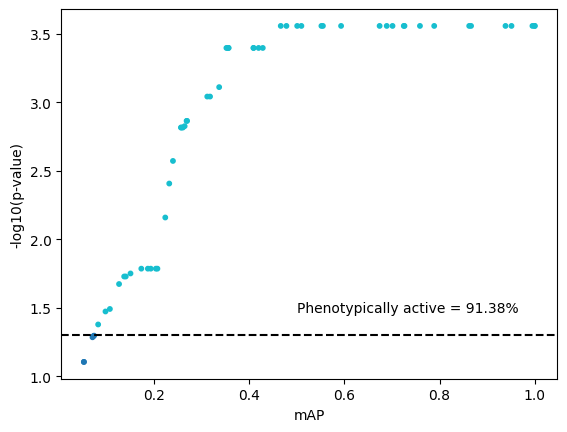

In [9]:
plt.scatter(data=map_scores, x="mean_average_precision", y="-log10(p-value)", c="below_corrected_p", cmap="tab10", s=10)
plt.xlabel("mAP")
plt.ylabel("-log10(p-value)")
plt.axhline(-np.log10(0.05), color="black", linestyle="--")
plt.text(0.5, 1.5, f"Phenotypically active = {100*map_scores.below_corrected_p.mean():.2f}%", va="center", ha="left")
plt.show()

## Calculate mAP for assessing phenotypic consistency of compounds grouped by targets

Phenotypic consitency of a group of perturbations reflects the average extent to which members of this group are more similar to each other compared to other groups (see Figure 1F).

When computing phenotypic consistency, each perturbation’s replicate profiles are usually aggregated into a consensus profile by taking the median of each feature to reduce profile noise and improve computational efficiency.

In [21]:
# aggregate replicates per perturbation using sample id and target
df_agg = aggregate(df, strata=["Metadata_broad_sample", "Metadata_target"])
df_agg = df_agg[df_agg["Metadata_target"].isna() == False]
df_agg['Metadata_target'] = df_agg['Metadata_target'].str.split('|')
df_agg.head(10)

,Metadata_broad_sample,Metadata_target,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_Orientation,Cells_AreaShape_Solidity,Cells_AreaShape_Zernike_0_0,Cells_AreaShape_Zernike_1_1,Cells_AreaShape_Zernike_2_0,...,Nuclei_Texture_InverseDifferenceMoment_AGP_5_0,Nuclei_Texture_InverseDifferenceMoment_DNA_20_0,Nuclei_Texture_InverseDifferenceMoment_ER_5_0,Nuclei_Texture_InverseDifferenceMoment_Mito_10_0,Nuclei_Texture_InverseDifferenceMoment_Mito_5_0,Nuclei_Texture_SumAverage_RNA_5_0,Nuclei_Texture_SumEntropy_DNA_10_0,Nuclei_Texture_SumEntropy_DNA_20_0,Nuclei_Texture_SumEntropy_DNA_5_0,Nuclei_Texture_Variance_RNA_10_0
1,BRD-A69636825-003-04-7,"[CACNA1C, CACNA1S, CACNA2D1, CACNG1, HTR3A, KC...",-0.326365,0.651610,0.211280,0.092412,0.456915,0.486515,0.435545,0.863160,...,0.175200,0.557360,-0.859465,0.409045,0.201909,-1.003185,-1.405850,-1.495100,-0.867225,-0.066115
2,BRD-A69815203-001-07-6,"[ABCB11, CAMLG, FPR1, PPIA, PPIF, PPP3CA, PPP3...",2.487450,-2.872750,0.616635,-0.451942,-2.260100,-3.300900,0.316320,-1.825400,...,-2.681800,-0.197230,-4.717350,0.644170,1.324100,0.103070,0.986025,1.346200,0.773450,-2.749350
3,BRD-A70858459-001-01-7,"[ESR1, ESR2, MAP1A, MAP2]",-0.920210,1.461550,0.445630,-0.394235,1.528450,1.116100,-0.054990,1.061270,...,0.238875,0.326475,0.064563,0.187646,0.200447,-0.695660,0.100225,0.401885,0.114583,-0.245753
4,BRD-A72309220-001-04-1,"[HTR1A, HTR1B, HTR1D, HTR1E, HTR1F, HTR2A, HTR...",0.045435,0.099755,0.103628,0.592620,-0.352200,0.202930,-0.059855,-0.353755,...,1.069575,-0.475915,-0.174002,0.217965,0.090715,-0.154695,0.165235,-0.160191,0.242195,-0.126886
6,BRD-A73368467-003-17-6,[HRH1],-0.062074,-0.314820,0.526190,-0.502485,-0.444675,-0.191225,0.145019,0.018870,...,0.527805,-1.204250,0.615420,-0.187645,0.321880,1.013235,0.793675,0.682925,1.075500,0.844115
8,BRD-A81233518-004-16-1,"[CHRM1, CHRM2, CHRM3, CHRM4, CHRM5]",-0.612415,-0.128128,-0.741865,0.178005,0.006800,0.282935,0.587865,0.561290,...,0.659600,-0.702090,-0.011905,-0.000570,0.066570,0.015971,0.257335,0.140519,0.471360,-0.283820
9,BRD-A82035391-001-02-7,"[AVPR1A, AVPR2]",-0.300770,0.132704,-0.619200,0.053390,-0.329085,0.107972,0.157675,0.834860,...,-1.682600,0.840775,0.287105,-0.617285,-0.596950,0.194805,-1.037480,-0.871205,-0.846345,0.533585
10,BRD-A82156122-001-01-9,[DPP4],-0.229737,-0.045755,-1.031130,0.078795,-0.541225,0.393505,-0.494920,0.976335,...,0.154289,0.216080,0.636485,0.088675,-0.438930,-0.251265,-0.333184,-0.601420,-0.130211,0.183651
11,BRD-K50691590-001-02-2,"[PSMA1, PSMA2, PSMA3, PSMA4, PSMA5, PSMA6, PSM...",7.777100,-2.558850,-0.169902,-0.768970,6.395400,-7.443450,-7.568300,-21.230000,...,-5.809700,0.732385,-7.893800,-6.190550,-1.162450,2.364450,1.785100,1.329300,-1.494850,1.846500
12,BRD-K60230970-001-10-0,[PSMB1],-4.508950,10.006400,2.551850,-0.706140,13.484500,6.264200,-5.839750,-11.688000,...,-5.048700,0.381675,-3.348650,-6.486350,-0.308715,3.929950,1.430250,3.869900,-5.724050,6.475100


In [38]:
# positive pairs are compounds that share a target
pos_sameby = ["Metadata_target"]
pos_diffby = []

neg_sameby = []
# negative pairs are compounds that do not share a target
neg_diffby = ["Metadata_target"]

metadata = df_agg.filter(regex="^Metadata")
profiles = df_agg.filter(regex="^(?!Metadata)").values

ap_scores = map.multilabel.average_precision(
        metadata,
        profiles,
        pos_sameby=pos_sameby,
        pos_diffby=pos_diffby,
        neg_sameby=neg_sameby,
        neg_diffby=neg_diffby,
        multilabel_col='Metadata_target')
ap_scores

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

,Metadata_broad_sample,average_precision,n_pos_pairs,n_total_pairs,Metadata_target
56,BRD-A69636825-003-04-7,0.500000,1,50,HTR3A
36,BRD-A72309220-001-04-1,0.380556,4,50,HTR1A
41,BRD-A72309220-001-04-1,0.125000,1,47,HTR1B
43,BRD-A72309220-001-04-1,0.125000,1,47,HTR1D
45,BRD-A72309220-001-04-1,0.125000,1,47,HTR1E
...,...,...,...,...,...
19,BRD-K74363950-004-01-0,0.083882,2,50,CHRM4
22,BRD-K74363950-004-01-0,0.083882,2,50,CHRM5
28,BRD-K76908866-001-07-6,0.500000,1,50,ERBB2
30,BRD-K80700417-001-04-2,0.020833,1,50,FLT3


In [39]:
map_scores = map.mean_average_precision(ap_scores, pos_sameby, null_size=10000, threshold=0.05, seed=0)
map_scores["-log10(p-value)"] = -map_scores["corrected_p_value"].apply(np.log10)
map_scores.head(10)

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

,Metadata_target,mean_average_precision,p_value,corrected_p_value,below_p,below_corrected_p,-log10(p-value)
0,ADRA1A,0.238095,0.092591,0.170059,False,False,0.769399
1,ADRA2A,0.238095,0.092591,0.170059,False,False,0.769399
2,AURKA,0.625000,0.001900,0.011019,True,True,1.957862
3,BIRC2,0.047727,0.405359,0.534337,False,False,0.272184
4,CHRM1,0.081192,0.504350,0.541709,False,False,0.266234
5,CHRM2,0.081192,0.504350,0.541709,False,False,0.266234
6,CHRM3,0.081192,0.504350,0.541709,False,False,0.266234
7,CHRM4,0.081192,0.504350,0.541709,False,False,0.266234
8,CHRM5,0.081192,0.504350,0.541709,False,False,0.266234
9,DRD2,0.750000,0.000800,0.005799,True,True,2.236615


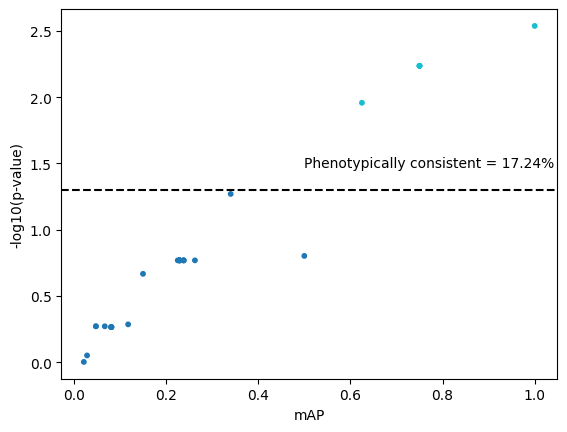

In [41]:
plt.scatter(data=map_scores, x="mean_average_precision", y="-log10(p-value)", c="below_corrected_p", cmap="tab10", s=10)
plt.xlabel("mAP")
plt.ylabel("-log10(p-value)")
plt.axhline(-np.log10(0.05), color="black", linestyle="--")
plt.text(0.5, 1.5, f"Phenotypically consistent = {100*map_scores.below_corrected_p.mean():.2f}%", va="center", ha="left")
plt.show()